<h2 id="exercises">Exercises</h2>


<p>Do your work for this exercise in a notebook named <code>modeling</code> within your <code>clustering-exercises</code> repository.</p>


1. Clustering with the Iris Dataset
Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.

    b. Visualize the results of your clustering.

    c. Use the elbow method to visually select a good value for `k`
    
    d. Repeat the clustering, this time with 3 different features.



In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

In [ ]:
from pydataset import data

# import data
iris = data('iris')
iris.head()

In [ ]:

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

In [ ]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

In [ ]:
# look at distribution of sepal length and petal_length

X.hist();

In [ ]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# look at the head
X_scaled.head()

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose=1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [ ]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

In [ ]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

In [ ]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

In [ ]:
# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

In [ ]:
# Labels (same as from predict)

kmeans.labels_

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [ ]:
iris.head()

In [ ]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

In [ ]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

In [ ]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

In [ ]:
# kmeans object has 'interia' attribute
kmeans.inertia_

In [ ]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# interia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# interia with k = 4

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

## Three feature iris clustering

In [ ]:
iris.head()

In [ ]:
sns.histplot(data=iris, x='sepal_length', hue='species', alpha=0.2)

In [ ]:
sns.histplot(data=iris, x='sepal_width', hue='species', alpha=0.2)

In [ ]:
sns.histplot(data=iris, x='petal_width', hue='species')

In [ ]:
sns.histplot(data=iris, x='petal_length', hue='species')

Use petal width and length plus sepal length

In [ ]:
# define independent variables for k-means

X = iris[[ 'petal_length', 'petal_width', 'sepal_length']]
X.head()

In [ ]:
# look at distribution of sepal length and petal_length

X.hist();

In [ ]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# look at the head
X_scaled.sample(25)

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose=1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [ ]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

In [ ]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


In [ ]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [ ]:
sql = 'select * from customers'


In [ ]:
# acquire mall customers data using the query:

def get_mall_customers(sql):
    url = get_db_url('mall_customers')
    mall_df = pd.read_sql(sql, url, index_col='customer_id')
    return mall_df

In [ ]:
# acquire data

mall_df = get_mall_customers(sql)

In [ ]:
mall_df.head()


In [ ]:
df = mall_df

In [ ]:
def encode_gender(row):
    if row['gender'] == 'Male':
        return 1
    if row['gender'] == 'Female':
        return 0


In [ ]:
df['is_male'] = df.apply (lambda row: encode_gender(row), axis=1)


In [ ]:
df.sample(25)

In [ ]:
# import mitosheet
# mitosheet.sheet()

In [ ]:

X = df[['age', 'annual_income', 'spending_score', 'is_male']]
X.head()

In [ ]:
# look at distribution of sepal length and petal_length

X.hist();

In [ ]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# look at the head
X_scaled.head()

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose=1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [ ]:
df.sample(25)

In [ ]:
kmeans.cluster_centers_

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

In [ ]:
# Labels (same as from predict)

kmeans.labels_

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'annual_income', y = 'spending_score', data = X_scaled, hue = 'is_male')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'annual_income', y = 'spending_score',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# What value of k is appropriate?

fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

Looks like k=5 is a good number of clusters



3. How does scaling impact the results of clustering?


Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



Clustering breaks down with unscaled data. Distances are weighted by the magnitude of the units for that particular facet. 


<p><strong>Bonus</strong><br />
a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing<br />
b) Visualize the data and guess the number and shape of the clusters.<br />
c) Implement the KMeans algorithm on unscaled data and visualize the clusters.<br />
d) Repeat the step above but with scaled data.  <br />
c) Write down the takeaways from this exercise.</p>

In [24]:
df = pd.read_csv('cluster_data.csv')

In [25]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


<AxesSubplot:xlabel='x', ylabel='y'>

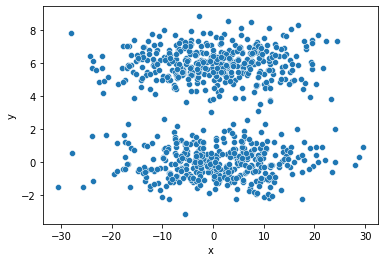

In [26]:
sns.scatterplot(data=df, x='x', y='y')

In [27]:
X=df[['x', 'y']]
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


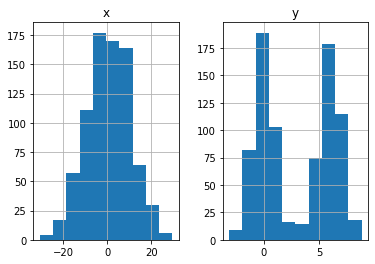

In [28]:
X.hist();

In [29]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123, verbose=0)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [30]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

In [31]:
df.sample(15)

,x,y,cluster
358,17.635787,0.400929,0
443,-4.705222,7.138724,1
702,-5.695042,6.922421,1
795,3.941363,5.807617,0
362,4.205165,1.208961,0
...,...,...,...
90,-13.458500,-1.140942,1
478,-7.348696,7.087048,1
103,-5.913682,0.322120,1
258,-12.970594,-0.473816,1


<AxesSubplot:xlabel='x', ylabel='y'>

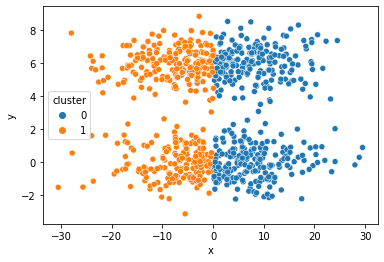

In [32]:
sns.scatterplot(data=df, x='x', y='y', hue='cluster')

In [33]:
kmeans.inertia_

35379.036324111934

SyntaxError: positional argument follows keyword argument (3757588101.py, line 6)

In [36]:
X_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,1.046060
1,-0.821099,-0.368472,1.046060
2,-0.708466,-0.920978,1.046060
3,0.729546,-0.756937,-0.955968
4,1.694464,-0.833249,-0.955968


In [14]:
# sklearn implementation of KMeans

#define the thing
kmeans_scaled = KMeans(n_clusters=2, random_state = 123, verbose=0)

# fit the thing
kmeans_scaled.fit(X_scaled)

# Use (predict using) the thing 
kmeans_scaled.predict(X_scaled)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [15]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster2'] = kmeans_scaled.predict(X_scaled)

X['cluster2'] = kmeans_scaled.predict(X_scaled)

In [16]:
df.head()

,x,y,cluster,cluster2
0,-3.641747,0.121540,1,1
1,-7.620447,1.810897,1,1
2,-6.505373,0.068072,1,1
3,7.730963,0.585521,0,0
4,17.283668,0.344804,0,0


In [17]:
df['diff']=df.cluster-df.cluster2

In [18]:
df.sample(25)

,x,y,cluster,cluster2,diff
423,9.352075,5.518817,0,0,0
37,3.772490,-0.456534,0,0,0
149,10.033625,-2.107295,0,0,0
391,1.791939,0.479200,0,0,0
180,5.948143,0.613614,0,0,0
...,...,...,...,...,...
77,-5.388369,-0.814880,1,1,0
108,2.972868,-0.337485,0,0,0
719,21.652144,5.665676,0,0,0
730,8.868261,5.120659,0,0,0


In [22]:
X_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,1.046060
1,-0.821099,-0.368472,1.046060
2,-0.708466,-0.920978,1.046060
3,0.729546,-0.756937,-0.955968
4,1.694464,-0.833249,-0.955968


In [21]:
df.describe()

,x,y,cluster,cluster2,diff
count,800.000000,800.000000,800.000000,800.000000,800.0
mean,0.508449,2.973206,0.477500,0.477500,0.0
std,9.906209,3.156376,0.499806,0.499806,0.0
min,-30.572062,-3.146259,0.000000,0.000000,0.0
25%,-6.068600,-0.047636,0.000000,0.000000,0.0
50%,0.581809,3.040642,0.000000,0.000000,0.0
75%,7.579269,5.996474,1.000000,1.000000,0.0
max,29.489457,8.817347,1.000000,1.000000,0.0


In [ ]:
X_scaled.sample(15)

<AxesSubplot:xlabel='x', ylabel='y'>

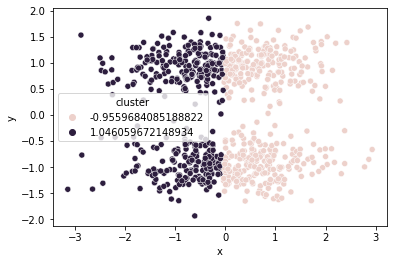

In [39]:
sns.scatterplot(data=X_scaled, x='x', y='y', hue='cluster')

In [41]:
kmeans2.inertia_

NameError: name 'kmeans2' is not defined